<a href="https://colab.research.google.com/github/pourmand1376/Notebooks/blob/main/Sleep_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install hazm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.7/316.7 KB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 43.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 KB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394488 sha256=d03f41aec8aa84aa8fb42b87611983b42c1cf9d70dc84b72b2760db197442d6f
  Stored in directory: /root/.cache/pip/wheels/ac/62/f6/88933dadcd64a1614894614aa68cf57c4b8e5256acb650b1f1
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp39-cp39-linux_x86_64.whl size=180363 sha256=af64906f16e35819acdbf90809242462100a3477b40a0accba5b2091342d50b6
  Stored in directory: /root/.cache/pip/wheels/8e/ff/82/9326b96f96f47472e02c453697b225813e4650c0ed4df2cd49
Successfully built nltk libwapiti
  Attempting unin

In [2]:
!pip install docx2txt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3977 sha256=293564d0b4ae4f88754af9d32a76a4a7e5b1a682aaf0fd603b445ceead824453
  Stored in directory: /root/.cache/pip/wheels/40/75/01/e6c444034338bde9c7947d3467807f889123465c2371e77418
Successfully built docx2txt


In [3]:
import pandas as pd

In [5]:
pd.set_option('display.max_rows', 30)

In [7]:
import docx2txt
my_text=docx2txt.process('/content/2.docx')

In [8]:
from hazm import Normalizer, WordTokenizer
norm =Normalizer()
my_text=norm.normalize(my_text)
my_text=norm.character_refinement(my_text)

In [9]:
tokenizer = WordTokenizer()
words=tokenizer.tokenize(my_text)

In [10]:
!git clone https://github.com/kharazi/persian-stopwords
!git clone https://github.com/ziaa/Persian-stopwords-collection
!wget https://raw.githubusercontent.com/pam-lab/PrePars/main/src/prepars/PVC/Data/TXT/all_verbs.txt

Cloning into 'persian-stopwords'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 51 (delta 7), reused 5 (delta 5), pack-reused 42
Unpacking objects: 100% (51/51), 34.96 KiB | 2.06 MiB/s, done.
Cloning into 'Persian-stopwords-collection'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 47 (delta 0), reused 4 (delta 0), pack-reused 40
Unpacking objects: 100% (47/47), 21.14 KiB | 1.76 MiB/s, done.
--2023-03-16 17:28:17--  https://raw.githubusercontent.com/pam-lab/PrePars/main/src/prepars/PVC/Data/TXT/all_verbs.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 471649

In [11]:
from pathlib import Path
def file_reader(path):
    return Path(path,encoding='UTF-8').read_text().split()

In [12]:
from pathlib import Path
stop1= file_reader('persian-stopwords/persian') + \
        file_reader('persian-stopwords/verbal') + \
        file_reader('persian-stopwords/nonverbal') + \
        file_reader('persian-stopwords/verbal') + \
        file_reader('persian-stopwords/chars')

prefix = 'Persian-stopwords-collection/Stopwords/'
stop2 = file_reader(prefix+ 'Kharazi/Pesian_Stop_Words_List.txt') + \
        file_reader(prefix+ 'Mazdak/Persian_StopList.txt') + \
        file_reader(prefix+'Mojiry/PersianStopWords.txt') + \
        file_reader(prefix+ 'Savoy/persianST.txt') + \
        file_reader(prefix+ 'Taghva/non-verbal_stopwords.txt') + \
        file_reader(prefix+ 'shokri/stop-words.txt')

verbs = Path('all_verbs.txt',encoding='UTF-8').read_text()
raw_verbs = [verb.split(',')[0] for verb in verbs.split('\n')]

ignore = ['ﮐﻪ', 'اﺳﺖ', 'ﻣﯽ', 'اﮔﺮ', 'ﺑﻪ', 'ﺑﯿﻨﺪ', 
        'ﮔﻮﯾﺪ', 'ﺑﺮ', 'ﺑﻮد', 'ﺑﺎ', 'ﺑﺎ', 'ﺑﺒﯿﻨﯿﺪ', 'ﯾﺎ' ,]

all = set(stop1 + stop2 + raw_verbs+ignore)
all = [item.replace(' ','') for item in all]

In [22]:
from collections import Counter
cleaned_list = []
for item in Counter(words).most_common(1000):
    if item[0].strip() not in all:
        cleaned_list.append(item)

In [23]:
pd.DataFrame(cleaned_list)

,0,1
0,ﺧﻮاب,10671
1,دﻟﯿﻞ,6532
2,ﺷﻤﺎ,5061
3,ﯾﺎ,3149
4,دﯾﺪن,3023
...,...,...
925,ﻣﯿﮑﻨﺪ,53
926,دروﯾﺶ,53
927,ﻧﯿﺖ,53
928,آﯾﻨﺪه‌ای,53


In [24]:
pip install wordcloud-fa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


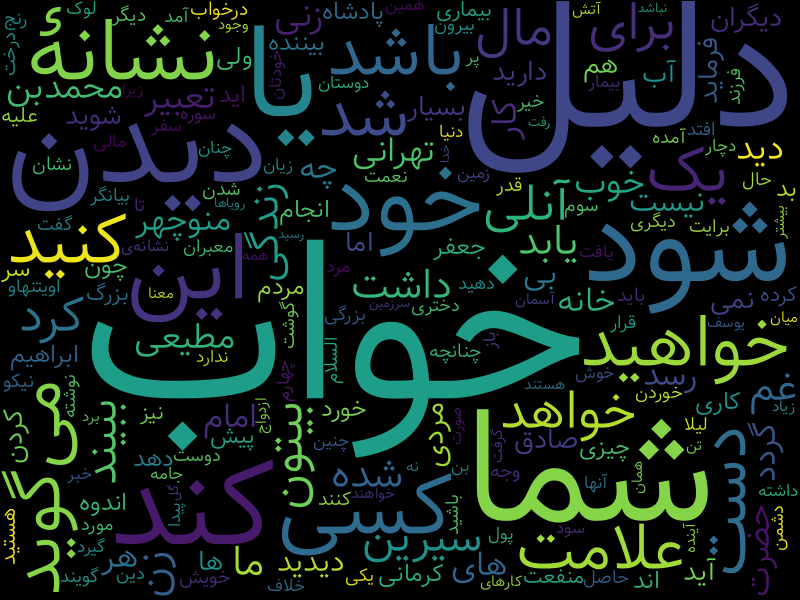

In [26]:
from wordcloud_fa import WordCloudFa

wc = WordCloudFa(width=800, height=600,persian_normalize=True,
                 include_numbers=False,stopwords=all,no_reshape=True)

freq_dict = {item[0]:item[1] for item in cleaned_list}

word_cloud = wc.generate_from_frequencies(freq_dict)
image = word_cloud.to_image()
image.show()